In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from copy import deepcopy as cdc

from datetime import datetime as dt
import re
def extract_timestamps(series:pd.Series) -> pd.Series:
    timestamp = series.str.extract('_(\d{4}-[\-\d_T]*)DLC', expand=False)
    return pd.to_datetime(timestamp, format="%Y-%m-%dT%H_%M_%S")
##need to have filename column as type str in order for datetime extraction to be used, won't run on Posix type

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import prey_capture_python as preycap
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
h5_newmice="/Users/mollyshallow/Desktop/opto_metrics_result/20230605_newcohort_LD.h5"
h5_oldmice="/Users/mollyshallow/Desktop/opto_metrics_result/20230605_oldcohorts_LD.h5"

In [3]:
df_old=pd.read_hdf(h5_oldmice, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_old['folder_path'].astype('str')))
df_old['filename']=df_old['filename'].astype('str')
# type(df_all['filename'][0])
df_old=df_old[df_old['filename'].str.contains('0896|0897|0898|0893|0895')]
df_old['capduration']=df_old['captureT']-df_old['timetointercept']

df_new=pd.read_hdf(h5_newmice, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_new['folder_path'].astype('str')))
df_new['filename']=df_new['filename'].astype('str')
# type(df_all['filename'][0])
df_new=df_new[df_new['filename'].str.contains('1337|1429|1430')]
df_new['capduration']=df_new['captureT']-df_new['timetointercept']

df_all=pd.concat([df_old, df_new], ignore_index=True)

nandf=cdc(df_all)
nans=np.where(nandf['captureT']>=120)
nanvals=nandf['captureT'].iloc[nans[0]]
nandf=nandf.replace({'captureT':nanvals.values}, np.nan)

nandf['capduration']=nandf['captureT']-nandf['timetointercept']

test_nandf=cdc(nandf)
test_nandf= test_nandf.drop(test_nandf[test_nandf.trials_to_drop == 'both'].index)

In [4]:
test_nandf

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-03_10-35-15_mouse-0896,test,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.8795219943601467, 2.442993623570855, 1.0383...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,23677.0,117120.0,0.002539,104.710,1.000000,0.500000,105.110,21022.0,5.44500,NaN,NaN
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-03_10-48-30_mouse-0897,test,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.198352308904875, 9.166484098923334, 9.41997...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",99.920,45034.0,65018.0,0.001382,61.795,1.000000,1.000000,62.520,12504.0,4.10750,37.400,NaN
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-04_10-34-40_mouse-0897,test,NaN,"[46.392508377380324, 47.23411538032969, 47.337...","[3.9652614660669916, 4.119093399691461, 4.1241...","[50.618691414766595, 50.71237504843739, 50.828...","[nan, 111.63212588755803, 104.85524437232709, ...",NaN,0.0,122683.0,0.058687,9.405,0.055556,0.500000,272.485,54497.0,259.39575,NaN,NaN
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-04_9-56-15_mouse-0896,test,NaN,"[40.04921463768118, 40.035394536679895, 40.026...","[1.2688213867795146, 1.3035432250095929, 1.311...","[3.0117482064091323, 3.2035749056084173, 3.922...","[81.05892397374892, 80.5885024990399, 77.60461...",NaN,0.0,119897.0,0.085072,14.975,0.019608,1.000000,586.245,117249.0,47.50325,NaN,NaN
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-07_13-59-24_mouse-0898,5,NaN,"[40.89803428142533, 41.589963686138944, 41.583...","[12.590891895604264, 12.590891895604264, 12.58...","[1.2404139363968412, 1.216827476662106, 1.4645...","[139.4622072253276, 140.52615233536343, 140.77...",NaN,0.0,97617.0,0.051220,1.110,0.080000,0.500000,326.680,65336.0,39.82925,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,9,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,6310.0,0.141276,1.825,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only
2458,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,9,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,3938.0,0.197472,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only
2459,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,9,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,3114.0,0.040080,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only
2460,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,9,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,43611.0,0.163335,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only


In [5]:
indices=np.asarray(test_nandf.index)
for i in indices:
    if test_nandf['condition'][i]=='9':
        test_nandf.at[i, 'condition']='2'

# conds_keep=test_nandf[test_nandf['condition'].str.contains('1|2', na=False)]
# conds_keep
test_nandf

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-03_10-35-15_mouse-0896,test,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.8795219943601467, 2.442993623570855, 1.0383...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,23677.0,117120.0,0.002539,104.710,1.000000,0.500000,105.110,21022.0,5.44500,NaN,NaN
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-03_10-48-30_mouse-0897,test,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.198352308904875, 9.166484098923334, 9.41997...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",99.920,45034.0,65018.0,0.001382,61.795,1.000000,1.000000,62.520,12504.0,4.10750,37.400,NaN
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-04_10-34-40_mouse-0897,test,NaN,"[46.392508377380324, 47.23411538032969, 47.337...","[3.9652614660669916, 4.119093399691461, 4.1241...","[50.618691414766595, 50.71237504843739, 50.828...","[nan, 111.63212588755803, 104.85524437232709, ...",NaN,0.0,122683.0,0.058687,9.405,0.055556,0.500000,272.485,54497.0,259.39575,NaN,NaN
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-04_9-56-15_mouse-0896,test,NaN,"[40.04921463768118, 40.035394536679895, 40.026...","[1.2688213867795146, 1.3035432250095929, 1.311...","[3.0117482064091323, 3.2035749056084173, 3.922...","[81.05892397374892, 80.5885024990399, 77.60461...",NaN,0.0,119897.0,0.085072,14.975,0.019608,1.000000,586.245,117249.0,47.50325,NaN,NaN
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-07_13-59-24_mouse-0898,5,NaN,"[40.89803428142533, 41.589963686138944, 41.583...","[12.590891895604264, 12.590891895604264, 12.58...","[1.2404139363968412, 1.216827476662106, 1.4645...","[139.4622072253276, 140.52615233536343, 140.77...",NaN,0.0,97617.0,0.051220,1.110,0.080000,0.500000,326.680,65336.0,39.82925,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,6310.0,0.141276,1.825,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only
2458,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,3938.0,0.197472,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only
2459,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,3114.0,0.040080,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only
2460,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,43611.0,0.163335,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only


In [8]:
light_trials=conds_keep[conds_keep['condition'].str.contains('1', na=False)]
light_trials

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-10_10-00-06_mouse-0896,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.7409957277682093, 1.8043564226373539, 1.943...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.960,2786.0,3778.0,0.132450,0.955,0.250000,1.000000,4.160,832.0,10.98650,0.800,NaN
52,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-10_10-15-31_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.2736812180669475, 5.538678124903959, 5.8628...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9.155,2033.0,3864.0,0.099668,0.830,1.000000,0.333333,2.690,538.0,9.82625,6.465,NaN
53,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-10_10-17-24_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.6607266263611489, 1.9237976743785534, 2.717...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.900,1771.0,6351.0,0.166488,8.905,0.714286,0.200000,13.150,2630.0,11.94925,9.750,NaN
54,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-10_10-19-26_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.6852905966486629, 0.9424460568841765, 1.084...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",39.285,2269.0,10126.0,0.228702,0.535,0.750000,0.111111,1.300,260.0,12.92725,37.985,NaN
55,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-10_10-22-02_mouse-0897,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[6.055302407961652, 6.673316263909858, 7.59725...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.955,2515.0,3906.0,0.088483,2.235,0.333333,1.000000,6.915,1383.0,12.73900,0.040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-22_12-47-18_mouse-1429,1,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.471336482836043, 4.014320371340666, 4.09772...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",14.525,1566.0,4471.0,0.259740,0.410,0.625000,0.200000,5.250,1050.0,10.51850,9.275,left_only
2234,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-22_12-48-58_mouse-1429,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.2154560820554363, 2.741399640998769, 2.8346...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",14.750,1415.0,4365.0,0.263244,0.120,0.714286,0.200000,0.975,195.0,9.74475,13.775,left_only
2235,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-22_12-51-19_mouse-1429,1,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.9322948957073083, 2.4126059181912614, 3.172...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9.055,2724.0,4535.0,0.029442,8.495,1.000000,1.000000,9.045,1809.0,15.68650,0.010,left_only
2238,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-22_9-53-28_mouse-1337,1,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.7604925598423619, 1.6177873049152376, 2.574...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",106.055,1811.0,23022.0,0.160946,0.045,0.500000,0.100000,31.880,6376.0,11.17400,74.175,left_only


In [9]:
dark_trials=conds_keep[conds_keep['condition'].str.contains('2', na=False)]
dark_trials

,filename,folder_path,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,c_length,capduration,trials_to_drop
153,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-16_11-45-44_mouse-0897,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.992957391194198, 4.036660175398256, 4.12090...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",13.690,1740.0,4478.0,0.120283,6.130,1.000000,0.250000,8.890,1778.0,10.35700,4.800,NaN
154,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-16_11-48-19_mouse-0897,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.406681230799017, 8.110645505300367, 8.54191...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.060,1307.0,3719.0,0.057778,7.155,1.000000,0.500000,8.720,1744.0,12.12250,3.340,NaN
155,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-16_11-50-31_mouse-0897,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.8538975783184237, 1.3668115383462216, 1.613...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",16.995,1694.0,5093.0,0.029722,9.175,1.000000,1.000000,9.395,1879.0,11.78250,7.600,NaN
156,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-16_11-52-38_mouse-0897,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.2887974172426655, 5.585433824195729, 6.8581...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.845,1298.0,3067.0,0.083368,0.585,1.000000,0.500000,4.005,801.0,10.37150,4.840,NaN
157,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-16_11-54-32_mouse-0897,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.7872543505109233, 0.7284541978983345, 0.457...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",4.380,1296.0,2172.0,0.046009,3.200,1.000000,1.000000,4.265,853.0,13.45900,0.115,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-25-16_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",22.525,1805.0,6310.0,0.141276,1.825,0.666667,0.250000,6.905,1381.0,9.36850,15.620,left_only
2458,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-27-15_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12.125,1513.0,3938.0,0.197472,0.250,0.200000,1.000000,11.625,2325.0,10.74700,0.500,left_only
2459,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-29-34_mouse-1430,2,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.740,1766.0,3114.0,0.040080,6.185,1.000000,1.000000,6.720,1344.0,10.24200,0.020,left_only
2460,/Volumes/Projects/PreyCapture/ZIActivation/202...,2023-01-29_13-30-57_mouse-1430,2,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,1494.0,43611.0,0.163335,8.170,0.263158,0.100000,27.820,5564.0,7.58625,NaN,left_only


In [9]:
np.where(test_nandf['condition']=='baseline_d')

(array([], dtype=int64),)

In [6]:
geometries=cdc(test_nandf)
geometries=geometries[['filename', 'dist','cricket_spd', 'mouse_spd', 'az']]

metadata=cdc(test_nandf)
metadata=metadata[['filename', 'folder_path', 'condition', 'laser_value', 'captureT', 'cricketdrop', 'captureframe', 'freqapproach','timetoapproach','prob_inter','prob_capture','timetointercept','interceptframe','c_length', 'capduration', 'trials_to_drop']] 


In [7]:
indices=np.asarray(metadata.index)
geometries_wframes=pd.DataFrame(columns=['filename','localframe','dist','cricket_spd','mouse_spd','az'])
warnings.simplefilter(action='ignore', category=FutureWarning)
for index in indices:
    name=index
    file=metadata['filename'][index]
    dist=geometries['dist'][index]
    cricket_spd=geometries['cricket_spd'][index]
    mouse_spd=geometries['mouse_spd'][index]
    az=geometries['az'][index]
    localframe=np.arange(0, len(dist))
    row=pd.Series({'filename':file,'localframe':localframe, 'dist':dist,'cricket_spd':cricket_spd, 'mouse_spd':mouse_spd,'az':az}, name=name)
    geometries_wframes=geometries_wframes.append(row)

In [8]:
geometries_wframes

,filename,localframe,dist,cricket_spd,mouse_spd,az
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.8795219943601467, 2.442993623570855, 1.0383...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.198352308904875, 9.166484098923334, 9.41997...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[46.392508377380324, 47.23411538032969, 47.337...","[3.9652614660669916, 4.119093399691461, 4.1241...","[50.618691414766595, 50.71237504843739, 50.828...","[nan, 111.63212588755803, 104.85524437232709, ..."
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[40.04921463768118, 40.035394536679895, 40.026...","[1.2688213867795146, 1.3035432250095929, 1.311...","[3.0117482064091323, 3.2035749056084173, 3.922...","[81.05892397374892, 80.5885024990399, 77.60461..."
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[40.89803428142533, 41.589963686138944, 41.583...","[12.590891895604264, 12.590891895604264, 12.58...","[1.2404139363968412, 1.216827476662106, 1.4645...","[139.4622072253276, 140.52615233536343, 140.77..."
...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[4.686184402668794, 5.375521759637996, 7.19742...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2458,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.593484666671011, 1.7669192009721417, 1.8651...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2459,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.55084575241241, 15.911738188176692, 18.134...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2460,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.6081144264218015, 6.058750344073401, 6.2490...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [13]:
keypoint_trials=[1295, 1314, 1456, 1603, 1675, 1676, 1309, 1503, 1560, 1592, 1626, 1666, 1689, 746,
                 926, 1042, 1162, 726, 843, 1204, 889, 1104, 1135, 1886, 2049, 2162, 1878, 2273, 2449,
                 2082, 2247, 2283, 2287, 2457]
keypoint_geometries_wframes=geometries_wframes.loc[keypoint_trials]
keypoint_geometries_wframes

keypoint_flat_geo_all=cdc(keypoint_geometries_wframes)
keypoint_flat_geo_all=keypoint_flat_geo_all.explode(['localframe','dist', 'cricket_spd', 'mouse_spd', 'az'])
keypoint_flat_geo_all
keypoint_flat_geo_all.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_geometries_allmice_satiated_keypoint_clipped_wframes_wnans.csv")

In [13]:
flat_geo_all=cdc(geometries_wframes)
flat_geo_all=flat_geo_all.explode(['localframe','dist', 'cricket_spd', 'mouse_spd', 'az'])

In [14]:
flat_geo_all

,filename,localframe,dist,cricket_spd,mouse_spd,az
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,0,NaN,NaN,2.879522,NaN
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,1,NaN,NaN,2.442994,NaN
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2,NaN,NaN,1.038356,NaN
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,3,NaN,NaN,1.077118,NaN
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,4,NaN,NaN,1.073163,NaN
...,...,...,...,...,...,...
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,11833,0.004961,NaN,5.313926,NaN
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,11834,0.00372,NaN,4.915112,NaN
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,11835,0.00248,NaN,3.801384,NaN
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,11836,0.00124,NaN,2.330691,NaN


In [15]:
flat_geo_all.isnull().sum()

filename             0
localframe           0
dist           2094497
cricket_spd    9780509
mouse_spd        44812
az             5463577
dtype: int64

In [16]:
len(geometries_wframes['localframe'].loc[52])

6020

In [20]:
len(geometries_wframes['dist'].loc[52])

6020

In [21]:
metadata.loc[1348]

filename           /Volumes/Projects/PreyCapture/ZIActivation/202...
folder_path                            2022-07-13_9-20-07_mouse-0896
condition                                                          1
laser_value                                                      0.0
captureT                                                      26.605
cricketdrop                                                   8657.0
captureframe                                                 13978.0
freqapproach                                                0.093646
timetoapproach                                                10.375
prob_inter                                                       0.5
prob_capture                                                     0.2
timetointercept                                                11.54
interceptframe                                                2308.0
c_length                                                      12.872
capduration                       

In [17]:
## before flattening the geometries, use drop and capture frames to trim out nans at the beginning and end, then can flatten
## could also interpolate values before flattening? but would need to loop through each row in order to do this, start with trimming for now
indices=np.asarray(geometries_wframes.index)
clipped_geos=pd.DataFrame(columns=['filename', 'localframe', 'dist', 'az', 'mouse_spd', 'cricket_spd'])
for i in indices:
    name=i
    filename=metadata['filename'][i]
    drop=int(np.asarray([metadata['cricketdrop'][i]])[0])
    # intercept=int(np.asarray([metadata['absoluteintercept'][i]])[0])
    capture=int(np.asarray([metadata['captureframe'][i]])[0])
    
    dist=geometries_wframes['dist'][i]
    clip_dist=dist[drop:capture]
    # print(clip_dist)
    clip_dist=clip_dist.astype(float)
    try:
        mask = pd.isna(clip_dist)
        clip_dist[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), clip_dist[~mask])
    except ValueError:
        print('empty array, no nans?')
    # clipped_geos['dist'][i]=clip_dist
    
    az=geometries_wframes['az'][i]
    clip_az=az[drop:capture]
    clip_az=clip_az.astype(float)
    try:
        mask = pd.isna(clip_az)
        clip_az[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), clip_az[~mask])
    except ValueError:
        print('empty array, no nans?')

    
    spd=geometries_wframes['mouse_spd'][i]
    clip_spd=spd[drop:capture]
    clip_spd=clip_spd.astype(float)
    try:
        mask = pd.isna(clip_spd)
        clip_spd[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), clip_spd[~mask])
    except ValueError:
        print('empty array, no nans?')
    # clipped_geos['mouse_spd'][i]=clip_spd
    
    cricket=geometries_wframes['cricket_spd'][i]
    clip_cricket=cricket[drop:capture]
    clip_cricket=clip_cricket.astype(float)
    try:
        mask = pd.isna(clip_cricket)
        clip_cricket[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), clip_cricket[~mask])
    except ValueError:
        print('empty array, no nans?')
    # clipped_geos['cricket_spd'][i]=clip_cricket
    
    frames=geometries_wframes['localframe'][i]
    clip_frames=frames[drop:capture]
    # clip_frames=clip_frames.astype(float)
    
    row=pd.Series({'filename':filename, 'localframe': clip_frames, 'dist':clip_dist, 'az': clip_az, 'mouse_spd':clip_spd, 'cricket_spd':clip_cricket}, name=name)
    clipped_geos=clipped_geos.append(row)

empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty array, no nans?
empty arra

In [18]:
clipped_geos

,filename,localframe,dist,az,mouse_spd,cricket_spd
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[23677, 23678, 23679, 23680, 23681, 23682, 236...","[2.7067112248254808, 2.706203565207222, 2.7611...","[121.75606046869937, 121.7171203771358, 100.83...","[21.761639730319917, 20.932042507254856, 20.03...","[1.6934664246028248, 1.6911551736510066, 1.688..."
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[45034, 45035, 45036, 45037, 45038, 45039, 450...","[14.84701684522871, 14.846173352492164, 14.845...","[28.1948844035788, 28.19412162644814, 28.19335...","[4.527631235886374, 4.527429861219469, 4.52722...","[0.24668776461533032, 0.4403528360099824, 0.44..."
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[46.392508377380324, 47.23411538032969, 47.337...","[111.63212588755803, 111.63212588755803, 104.8...","[50.618691414766595, 50.71237504843739, 50.828...","[3.9652614660669916, 4.119093399691461, 4.1241..."
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[40.04921463768118, 40.035394536679895, 40.026...","[81.05892397374892, 80.5885024990399, 77.60461...","[3.0117482064091323, 3.2035749056084173, 3.922...","[1.2688213867795146, 1.3035432250095929, 1.311..."
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[40.89803428142533, 41.589963686138944, 41.583...","[139.4622072253276, 140.52615233536343, 140.77...","[1.2404139363968412, 1.216827476662106, 1.4645...","[12.590891895604264, 12.590891895604264, 12.58..."
...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1805, 1806, 1807, 1808, 1809, 1810, 1811, 181...","[23.440994084120458, 24.235692545812917, 25.26...","[69.87032769866889, 72.69398780438665, 58.4219...","[30.925460965578555, 32.467365452712414, 33.34...","[205.95908367471648, 205.95908367471648, 205.9..."
2458,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1513, 1514, 1515, 1516, 1517, 1518, 1519, 152...","[20.39777374036026, 20.962233194139863, 21.306...","[98.89141735117667, 83.99819677441727, 93.8053...","[32.82237786431885, 32.77278082564692, 34.1193...","[138.63432691766857, 138.63432691766857, 138.6..."
2459,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1766, 1767, 1768, 1769, 1770, 1771, 1772, 177...","[23.299439991782208, 22.38430444280006, 21.796...","[106.52525959272204, 103.17274115796327, 103.9...","[18.36901420130032, 19.01385971285422, 18.6633...","[136.3018173547906, 136.3018173547906, 136.301..."
2460,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1494, 1495, 1496, 1497, 1498, 1499, 1500, 150...","[21.39851580039639, 21.846520351468158, 21.851...","[6.809527687653414, 6.771376104645519, 6.83876...","[2.272945898765627, 2.266673676750342, 2.86912...","[82.90144346538455, 82.90144346538455, 82.9014..."


In [16]:
## part of what needs to be dealt with right now is that there are now cricket speeds that are slight errors and they propegate for longer
## figure out a way to deal with the really high cricket speeds that are probably a result of the cricket either jumping, or 

In [19]:
flat_geo=cdc(clipped_geos)

flat_geometries=flat_geo.explode(['localframe','dist', 'cricket_spd', 'mouse_spd', 'az'])

In [20]:
flat_geometries

,filename,localframe,dist,az,mouse_spd,cricket_spd
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,23677,2.706711,121.75606,21.76164,1.693466
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,23678,2.706204,121.71712,20.932043,1.691155
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,23679,2.761172,100.834467,20.030635,1.688844
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,23680,2.802435,100.596783,18.26127,1.686533
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,23681,2.80478,96.415585,18.167826,1.684221
...,...,...,...,...,...,...
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,9783,3.367357,14.731411,32.3321,5.884759
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,9784,3.250048,13.385916,32.086828,5.884759
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,9785,3.089474,9.285001,31.908852,5.884759
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,9786,3.005516,9.535535,33.191403,5.884759


In [21]:
flat_geometries.isnull().sum()


filename        0
localframe     51
dist           51
az             51
mouse_spd      51
cricket_spd    51
dtype: int64

In [22]:
flat_geos_nonan=flat_geometries.dropna(axis=0, how='any')

In [23]:
flat_geos_nonan.isnull().sum()

filename       0
localframe     0
dist           0
az             0
mouse_spd      0
cricket_spd    0
dtype: int64

In [71]:
test=flat_geos_nonan[flat_geos_nonan['filename'].str.contains('Sky_mouse-1430_2023-01-29T13_25_16')]
test

,filename,localframe,dist,az,mouse_spd,cricket_spd
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,1805,23.440994,69.870328,30.925461,205.959084
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,1806,24.235693,72.693988,32.467365,205.959084
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,1807,25.263511,58.421995,33.345429,205.959084
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,1808,26.331569,75.047484,34.494435,205.959084
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,1809,26.880678,95.109056,33.734479,205.959084
...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,6305,6.981515,22.442428,33.133747,5.869723
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,6306,6.91367,23.274448,33.068457,5.871917
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,6307,6.757079,21.921773,31.380027,5.874111
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,6308,6.551485,32.04469,30.286606,5.876305


In [75]:
keypoint_flat_geos=flat_geos_nonan.loc[keypoint_trials]
keypoint_flat_geos
keypoint_flat_geos.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_geometries_allmice_D_satiated_keypoint_clipped_wframes_nonans.csv")

In [72]:
keypoint_trials=[1295, 1314, 1456, 1603, 1675, 1676, 1309, 1503, 1560, 1592, 1626, 1666, 1689, 746,
                 926, 1042, 1162, 726, 843, 1204, 889, 1104, 1135, 1886, 2049, 2162, 1878, 2273, 2449,
                 2082, 2247, 2283, 2287, 2457]

In [39]:
clipped_geos

,filename,localframe,dist,az,mouse_spd,cricket_spd
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[2786, 2787, 2788, 2789, 2790, 2791, 2792, 279...","[41.88292234946989, 42.154740431413046, 42.084...","[79.27962547111359, 101.68411483687439, 100.79...","[10.024623532845933, 9.4900120264195, 9.258347...","[252.00908816195712, 252.00908816195712, 252.0..."
52,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[2033, 2034, 2035, 2036, 2037, 2038, 2039, 204...","[31.57934483828629, 30.593490438512973, 29.486...","[94.99884961591447, 96.61600583254749, 108.026...","[5.590580391007325, 8.94164657620408, 9.322381...","[196.48083105737498, 196.48083105737498, 196.4..."
53,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1771, 1772, 1773, 1774, 1775, 1776, 1777, 177...","[35.033470073725006, 35.072971521088704, 35.07...","[43.05578014387806, 44.582850970113654, 44.106...","[1.989930884646681, 2.4125054303812585, 2.7086...","[176.04365546251003, 176.04365546251003, 176.0..."
54,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[2269, 2270, 2271, 2272, 2273, 2274, 2275, 227...","[59.442689520233294, 57.986826932888405, 57.16...","[128.4966937145345, 125.81176801457015, 123.81...","[1.6338237415148247, 1.6487669933915645, 1.765...","[206.70258171570813, 206.70258171570813, 206.7..."
55,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[2515, 2516, 2517, 2518, 2519, 2520, 2521, 252...","[43.12700968979054, 43.250384496997924, 43.542...","[81.23665350038891, 78.68192457461913, 79.9807...","[0.6369607189779232, 0.5668447481033579, 0.375...","[116.98119312602347, 111.98786974600728, 106.9..."
...,...,...,...,...,...,...
2233,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1566, 1567, 1568, 1569, 1570, 1571, 1572, 157...","[39.828505726923176, 39.047607155988906, 38.44...","[13.937262586252674, 9.842815201184182, 7.5432...","[5.004260683767233, 4.663527789000729, 3.14086...","[160.5143545293655, 160.5143545293655, 160.514..."
2234,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1415, 1416, 1417, 1418, 1419, 1420, 1421, 142...","[36.45515513677261, 36.52084923616454, 36.4072...","[5.406748661167343, 5.208263351618368, 5.91484...","[3.293947136408184, 3.288145284644761, 3.61936...","[83.82515346753931, 83.9796785073919, 84.13420..."
2235,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[2724, 2725, 2726, 2727, 2728, 2729, 2730, 273...","[50.3305926543488, 36.10976517253712, 36.02809...","[67.65424820961996, 87.55467976195732, 90.7553...","[9.763221682810173, 9.078174119892335, 7.84429...","[304.40472844115817, 304.40472844115817, 304.4..."
2238,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[1811, 1812, 1813, 1814, 1815, 1816, 1817, 181...","[5.505714160790158, 5.844686354404072, 6.34555...","[30.96893519501714, 24.65824598800527, 24.2026...","[11.282122302001705, 13.099911473580375, 13.48...","[105.5551464249352, 104.5263022315198, 103.497..."


In [53]:
flat_geos_nonan.loc[2125]

,filename,localframe,dist,az,mouse_spd,cricket_spd
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,0,40.401535,161.956334,2.556525,0.415103
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,1,40.39316,162.457118,2.634632,0.471426
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,2,40.393023,167.355299,3.164147,0.614683
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,3,40.396478,173.680735,3.412022,0.756626
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,4,40.386609,174.055795,5.574657,0.779974
...,...,...,...,...,...,...
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,61265,52.30945,50.748592,1.188602,0.432281
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,61266,52.321635,52.0501,1.188602,0.444419
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,61267,52.339787,53.7902,2.492987,0.44861
2125,/Volumes/Projects/PreyCapture/ZIActivation/202...,61268,52.366792,60.384247,2.244178,0.314424


In [23]:
flat_geos_nonan.index

Int64Index([ 153,  153,  153,  153,  153,  153,  153,  153,  153,  153,
            ...
            2461, 2461, 2461, 2461, 2461, 2461, 2461, 2461, 2461, 2461],
           dtype='int64', length=4289947)

In [25]:
indices=np.asarray(flat_geos_nonan.index)
random_samples=np.random.choice(indices, 10, replace=False)
print(random_samples)
# random_samples=[1339,  171,  141,  343, 2207, 2109, 1329, 2356, 2161, 1334, 2094, 2119,  157, 2409, 268, 2054, 1306, 1576,  265, 2215,  626, 2356, 1347, 2296,  205, 1393, 1621, 2165,
#  1336,  236,  655,  518, 2457,  508, 1400, 2207, 2080, 2366, 1381,  259, 1491, 2110,
#   108, 2061, 2354,  344, 1622, 2203,  631, 1576]
subset_flat_geos=flat_geos_nonan.loc[random_samples]
subset_flat_geos.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_geometries_allmice_D_satiated_10trials_clipped_wframes_nonans.csv")

[1402  500 2295 2409 2258 1559 1422  211  470 1453]


In [30]:
subset_flat_geos['filename'].loc[1402].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-16_10-28-00_mouse-0895/Sky_mouse-0895_2022-07-16T10_28_00DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [31]:
subset_flat_geos['filename'].loc[500].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-03-04_9-30-44_mouse-0897/Sky_mouse-0897_2022-03-04T09_30_44DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [32]:
subset_flat_geos['filename'].loc[2295].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2023-01-24_13-03-18_mouse-1337/Sky_mouse-1337_2023-01-24T13_03_18DLC_resnet50_optopreycapFeb16shuffle1_300000_el_filtered.csv'

In [33]:
subset_flat_geos['filename'].loc[2409].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2023-01-28_12-10-26_mouse-1337/Sky_mouse-1337_2023-01-28T12_10_26DLC_resnet50_optopreycapFeb16shuffle1_300000_el_filtered.csv'

In [34]:
subset_flat_geos['filename'].loc[2258].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2023-01-23_11-16-50_mouse-1337/Sky_mouse-1337_2023-01-23T11_16_50DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [35]:
subset_flat_geos['filename'].loc[1559].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-29_10-25-54_mouse-0895/Sky_mouse-0895_2022-07-29T10_25_55DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [36]:
subset_flat_geos['filename'].loc[1422].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-18_10-16-54_mouse-0895/Sky_mouse-0895_2022-07-18T10_16_54DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [37]:
subset_flat_geos['filename'].loc[211].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-02-20_15-52-01_mouse-0897/Sky_mouse-0897_2022-02-20T15_52_01DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [38]:
subset_flat_geos['filename'].loc[470].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-03-03_12-12-21_mouse-0897/Sky_mouse-0897_2022-03-03T12_12_21DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [39]:
subset_flat_geos['filename'].loc[1453].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-19_9-38-06_mouse-0893/Sky_mouse-0893_2022-07-19T09_38_06DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [52]:
indices=np.asarray(flat_geos_nonan.index)
random_samples=np.random.choice(indices, 100)
print(random_samples)
# random_samples=[1339,  171,  141,  343, 2207, 2109, 1329, 2356, 2161, 1334, 2094, 2119,  157, 2409, 268, 2054, 1306, 1576,  265, 2215,  626, 2356, 1347, 2296,  205, 1393, 1621, 2165,
#  1336,  236,  655,  518, 2457,  508, 1400, 2207, 2080, 2366, 1381,  259, 1491, 2110,
#   108, 2061, 2354,  344, 1622, 2203,  631, 1576]
subset_flat_geos=flat_geos_nonan.loc[random_samples]
subset_flat_geos.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_geometries_allmice_LD_satiated_100trials_clipped_wframes_nonans.csv")

[2125  676 2271   62 2354 1439  267 2169 2409 1333 2240 2158 2108 2301
  386 2226 1286  359 2093 2296   62 1661 2209 2121  590  493  150 2123
 2046  130 2162 2247  516 2327 1444 1365 2113 2263 2161 1441 2163 1494
 2266 2165 1298 1437 2110 2334 1529 1622 1711 1333  639 1687 2264 1445
 2036  309  486 2460 2113 1513 2298 1381  212 2111  449 1659 1574 2349
 2054  454 2429  359  150 1326 2385 2327 2160 1508 2456 2301 2123  325
 2335  145  237 2062  130 1393 1299 2107 2243  333 2113 2418 1311 2050
 2245 2174]


In [20]:
subset_flat_geos.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_geometries_allmice_LD_satiated_subset_clipped_wframes_nonans.csv")

In [ ]:
## use extract points to create a dlc tracks csv that corresponds to the geometries file and is in the same format as the flatted df
## need to have session ID or filename that corresponds to those same identifiers in the other file so that tracks can easily be loaded 
## similar to validate tracks, use datadirs to load the files and run extract points, then dump these values into arrays in a cell, will then later flatten/ explode these 
## before exploding, can remove unwanted trials, which should keep sessionID the same as other files

In [ ]:
indices=np.asarray(geometries.index)
clipped_geos=pd.DataFrame(columns=['filename', 'dist', 'az', 'mouse_spd', 'cricket_spd'])
for i in indices:
    name=i
    filename=metadata['filename'][i]

In [245]:
indices=np.asarray(metadata.index)
dlc_tracks=pd.DataFrame(columns=['filename', 'video_filename','localframe','mouse_x','mouse_y','cricket_x','cricket_y', 'rear_x', 'rear_y', 'lear_x','lear_y', 'headbase_x','headbase_y'])

for index in indices:
    name=index
    file=metadata['filename'][index]
    videofile=file[0:-12]+'bp_labeled.mp4'
    mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy, headbase_xy, cricket_front, cricket_back=preycap.extract_points(file, ['Rear', 'Lear', 'anteriorC', 'posteriorC','headbase'])
    mouse_x=mouse_xy[0]
    mouse_y=mouse_xy[1]
    cricket_x=cricket_xy[0]
    cricket_y=cricket_xy[1]
    rear_x=rear_xy[0]
    rear_y=rear_xy[1]
    lear_x=lear_xy[0]
    lear_y=lear_xy[1]
    headbase_x=headbase_xy[0]
    headbase_y=headbase_xy[1]
    localframe=np.arange(0, len(mouse_x))
    row=pd.Series({'filename':file,'video_filename':videofile,'localframe':localframe, 'mouse_x':mouse_x,'mouse_y':mouse_y, 'cricket_x':cricket_x,'cricket_y':cricket_y, 'rear_x':rear_x, 'rear_y':rear_y, 'lear_x':lear_x,'lear_y':lear_y, 'headbase_x':headbase_x,'headbase_y':headbase_y}, name=name)
    dlc_tracks=dlc_tracks.append(row)
dlc_tracks

,filename,video_filename,localframe,mouse_x,mouse_y,cricket_x,cricket_y,rear_x,rear_y,lear_x,lear_y,headbase_x,headbase_y
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[22.452689873417725, 22.4773417721519, 22.5064...","[45.45208860759494, 45.45629746835442, 45.4732...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[347.482, 348.044, 348.361, 348.424, 348.495, ...","[730.026, 730.055, 730.228, 730.682, 730.908, ...","[362.023, 362.24, 362.844, 362.904, 363.299, 3...","[706.26, 706.364, 706.728, 706.733, 706.805, 7...","[21.86411392405063, 21.875949367088605, 21.886...","[44.957215189873416, 44.97386075949367, 44.980..."
52,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21.222879746835442, 21.272183544303797, 21.28...","[41.7648417721519, 41.89503164556962, 41.91468...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[327.843, 328.709, 329.204, 329.204, 329.244, ...","[669.701, 673.287, 673.682, 675.148, 675.532, ...","[342.8, 343.492, 343.532, 343.632, 344.198, 34...","[650.068, 650.596, 650.822, 652.086, 652.24, 6...","[20.754746835443036, 20.759493670886076, 20.76...","[41.30373417721519, 41.46575949367088, 41.4959..."
53,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[30.12996835443038, 30.141803797468352, 30.142...","[37.522341772151904, 37.522341772151904, 37.52...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[490.595, 490.749, 490.756, 490.756, 490.756, ...","[587.218, 587.218, 587.218, 586.486, 586.023, ...","[461.512, 461.732, 461.76, 461.732, 461.745, 4...","[598.488, 598.488, 598.488, 597.766, 597.39, 5...","[30.34151898734177, 30.34151898734177, 30.3470...","[37.91405063291139, 37.91405063291139, 37.9140..."
54,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[70.18189873417721, 70.18262658227847, 70.1826...","[18.48237341772152, 18.497310126582278, 18.505...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1116.01, 1116.01, 1116.01, 1115.522, 1115.522...","[311.246, 311.406, 311.675, 312.103, 312.103, ...","[1101.738, 1101.761, 1101.761, 1101.761, 1101....","[272.797, 273.109, 273.109, 273.073, 273.286, ...","[69.42424050632911, 69.43620253164558, 69.4362...","[18.510632911392406, 18.520253164556962, 18.55..."
55,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20.41544303797468, 20.43107594936709, 20.4477...","[41.782721518987344, 41.782721518987344, 41.78...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[340.873, 341.051, 341.191, 341.693, 341.915, ...","[661.437, 661.437, 661.437, 660.883, 659.07, 6...","[304.255, 304.571, 304.959, 305.49, 306.777, 3...","[658.897, 658.897, 658.897, 658.331, 657.343, ...","[20.33259493670886, 20.33639240506329, 20.3579...","[42.07620253164556, 42.07620253164556, 42.1400..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[27.7979746835443, 27.875411392405063, 27.9374...","[50.14613924050632, 50.17737341772152, 50.1773...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[444.302, 446.749, 448.71, 446.749, 445.885, 4...","[777.532, 777.716, 777.716, 7

In [246]:
print(len(dlc_tracks['localframe'].loc[51]))
print(len(dlc_tracks['mouse_x'].loc[51]))

6040
6040


In [247]:
flat_dlc_tracks=dlc_tracks.explode(['localframe','mouse_x','mouse_y', 'cricket_x', 'cricket_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y', 'headbase_x', 'headbase_y'])
##add mp4 filename, and frame number

In [248]:
flat_dlc_tracks


,filename,video_filename,localframe,mouse_x,mouse_y,cricket_x,cricket_y,rear_x,rear_y,lear_x,lear_y,headbase_x,headbase_y
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,0,22.45269,45.452089,NaN,NaN,347.482,730.026,362.023,706.26,21.864114,44.957215
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,1,22.477342,45.456297,NaN,NaN,348.044,730.055,362.24,706.364,21.875949,44.973861
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2,22.506487,45.473291,NaN,NaN,348.361,730.228,362.844,706.728,21.886392,44.980253
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,3,22.51038,45.487816,NaN,NaN,348.424,730.682,362.904,706.733,22.013101,45.133038
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,4,22.525127,45.497247,NaN,NaN,348.495,730.908,363.299,706.805,22.016392,45.160253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,11833,52.789082,46.950411,NaN,NaN,846.686,732.565,821.449,751.068,53.240506,47.753354
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,11834,52.795949,46.990411,NaN,NaN,846.903,732.557,821.449,752.34,53.279241,47.787215
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,11835,52.797152,47.022911,NaN,NaN,846.941,732.557,821.449,753.367,53.290316,47.797152
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,11836,52.788766,47.022911,NaN,NaN,846.941,732.557,821.184,753.367,53.290316,47.797152


In [235]:
test_file[0:-12]
videofile=test_file[0:-12]+'bp_labeled.mp4'
videofile

'/Volumes/Projects/PreyCapture/ZIActivation/2022-02-10_10-00-06_mouse-0896/Sky_mouse-0896_2022-02-10T10_00_06DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_bp_labeled.mp4'

In [249]:
flat_dlc_tracks.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_dlctracks_allmice_LD_satiated.csv")

In [253]:
warnings.simplefilter(action='ignore', category=FutureWarning)
indices=np.asarray(dlc_tracks.index)
clipped_tracks=pd.DataFrame(columns=['filename', 'video_filename','localframe', 'mouse_x', 'mouse_y', 'cricket_x', 'cricket_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y', 'headbase_x', 'headbase_y'])
for i in indices:
    name=i
    filename=metadata['filename'][i]
    videofile=dlc_tracks['video_filename'][i]
    drop=int(np.asarray([metadata['cricketdrop'][i]])[0])
    capture=int(np.asarray([metadata['captureframe'][i]])[0])
    
    mouse_x=dlc_tracks['mouse_x'][i]
    clip_mouse_x=mouse_x[drop:capture]
    clip_mouse_x=clip_mouse_x.astype(float)
    
    mouse_y=dlc_tracks['mouse_y'][i]
    clip_mouse_y=mouse_y[drop:capture]
    clip_mouse_y=clip_mouse_y.astype(float)
    
    cricket_x=dlc_tracks['cricket_x'][i]
    clip_cricket_x=cricket_x[drop:capture]
    clip_cricket_x=clip_cricket_x.astype(float)
    
    cricket_y=dlc_tracks['cricket_y'][i]
    clip_cricket_y=cricket_y[drop:capture]
    clip_cricket_y=clip_cricket_y.astype(float)
      
    rear_x=dlc_tracks['rear_x'][i]
    clip_rear_x=rear_x[drop:capture]
    clip_rear_x=clip_rear_x.astype(float)
    
    rear_y=dlc_tracks['rear_y'][i]
    clip_rear_y=rear_y[drop:capture]
    clip_rear_y=clip_rear_y.astype(float)
    
    lear_x=dlc_tracks['lear_x'][i]
    clip_lear_x=lear_x[drop:capture]
    clip_lear_x=clip_lear_x.astype(float)
    
    lear_y=dlc_tracks['lear_y'][i]
    clip_lear_y=lear_y[drop:capture]
    clip_lear_y=clip_lear_y.astype(float)
    
    headbase_x=dlc_tracks['headbase_x'][i]
    clip_headbase_x=headbase_x[drop:capture]
    clip_headbase_x=clip_headbase_x.astype(float)
    
    headbase_y=dlc_tracks['headbase_y'][i]
    clip_headbase_y=headbase_y[drop:capture]
    clip_headbase_y=clip_headbase_y.astype(float)
    
    localframe=dlc_tracks['localframe'][i]
    clip_localframe=localframe[drop:capture]
    clip_localframe=clip_localframe.astype(float)
    
    row=pd.Series({'filename':filename, 'video_filename':videofile, 'localframe':clip_localframe,'mouse_x':clip_mouse_x, 'mouse_y':clip_mouse_y, 'cricket_x':clip_cricket_x, 'cricket_y':clip_cricket_y, 'rear_x':clip_rear_x, 'rear_y':clip_rear_y, 'lear_x':clip_lear_x, 'lear_y':clip_lear_y, 'headbase_x':clip_headbase_x, 'headbase_y':clip_headbase_y}, name=name)
    clipped_tracks=clipped_tracks.append(row)

In [254]:
flat_clipped_tracks=clipped_tracks.explode(['localframe','mouse_x','mouse_y', 'cricket_x', 'cricket_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y', 'headbase_x', 'headbase_y'])
flat_clipped_tracks

,filename,video_filename,localframe,mouse_x,mouse_y,cricket_x,cricket_y,rear_x,rear_y,lear_x,lear_y,headbase_x,headbase_y
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2786.0,43.275411,60.64231,69.792532,28.222848,686.538,953.386,680.965,962.911,43.961139,61.420316
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2787.0,43.260791,61.066234,68.878861,27.588829,686.068,953.386,680.973,976.307,43.981456,61.397468
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2788.0,43.271076,61.060854,67.627025,26.740728,686.348,952.825,681.018,976.698,44.011203,61.382532
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2789.0,43.29269,61.041392,66.335918,25.898418,686.538,952.21,681.511,976.698,44.280949,61.325443
51,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,2790.0,43.31962,61.029019,65.256234,25.206741,686.348,952.21,682.552,976.307,44.280949,61.308924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,9783.0,52.090127,48.423956,50.968671,45.248829,836.036,756.339,810.012,773.858,52.593987,49.074747
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,9784.0,51.943987,48.247753,50.968671,45.1475,833.727,753.348,807.703,771.281,52.350316,48.854051
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,9785.0,51.910475,48.085443,51.028323,45.124589,833.727,751.399,806.644,768.101,52.218481,48.668418
2461,/Volumes/Projects/PreyCapture/ZIActivation/202...,/Volumes/Projects/PreyCapture/ZIActivation/202...,9786.0,51.843892,48.055443,51.03693,45.160285,833.727,751.289,804.54,767.263,52.140696,48.633861


In [352]:
flat_clipped_tracks.isnull().sum()

filename                0
video_filename          0
localframe             31
mouse_x            397658
mouse_y            397377
cricket_x         1357617
cricket_y         1357359
rear_x             386295
rear_y             386098
lear_x             384107
lear_y             383996
headbase_x         385762
headbase_y         385710
dtype: int64

In [255]:
flat_clipped_tracks.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_dlctracks_allmice_LD_satiated_clipped.csv")

In [256]:
subset_flat_tracks=flat_dlc_tracks.loc[random_samples]
subset_flat_tracks.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_dlctracks_allmice_LD_satiated_subset.csv")

In [257]:
subset_clipped_tracks=flat_clipped_tracks.loc[random_samples]
subset_clipped_tracks.to_csv("/Volumes/Projects/PreyCapture/ZIActivation/flattened_dlctracks_allmice_LD_satiated_subset_clipped.csv")

In [258]:
subset_flat_geos

,filename,dist,az,mouse_spd,cricket_spd
1481,/Volumes/Projects/PreyCapture/ZIActivation/202...,34.384396,59.167589,2.053336,NaN
1481,/Volumes/Projects/PreyCapture/ZIActivation/202...,33.960225,59.405143,1.897669,NaN
1481,/Volumes/Projects/PreyCapture/ZIActivation/202...,33.536054,59.642696,1.742002,NaN
1481,/Volumes/Projects/PreyCapture/ZIActivation/202...,33.335349,60.372422,1.586335,NaN
1481,/Volumes/Projects/PreyCapture/ZIActivation/202...,33.316574,60.15992,1.430667,NaN
...,...,...,...,...,...
1348,/Volumes/Projects/PreyCapture/ZIActivation/202...,3.621813,21.800671,23.427289,8.693402
1348,/Volumes/Projects/PreyCapture/ZIActivation/202...,3.597804,11.142142,23.273125,9.190042
1348,/Volumes/Projects/PreyCapture/ZIActivation/202...,3.440098,3.52359,23.726385,9.686681
1348,/Volumes/Projects/PreyCapture/ZIActivation/202...,3.357639,9.977781,23.894296,10.183321


In [267]:
ranges=subset_flat_geos['dist'].loc[1481]
ranges=ranges.to_numpy()
ranges

array([34.38439553544721, 33.96022484059236, 33.536054145737516, ...,
       4.107875722298293, 3.9971082200431827, 3.833125582536172],
      dtype=object)

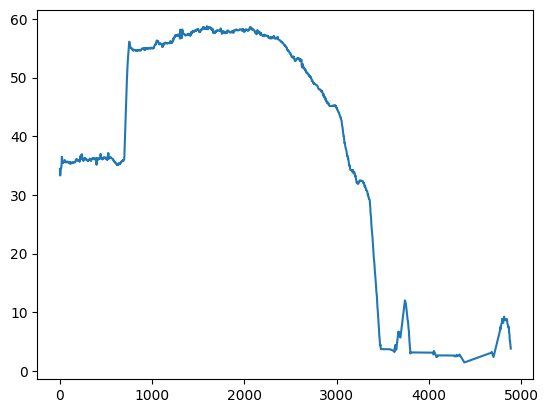

In [268]:
plt.plot(ranges)

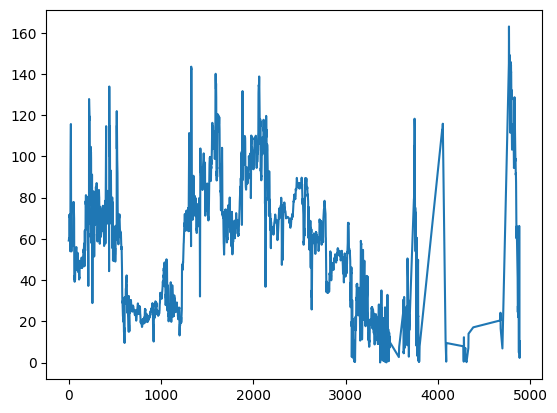

In [270]:
azs=subset_flat_geos['az'].loc[1481]
azs=azs.to_numpy()
azs
plt.plot(azs)

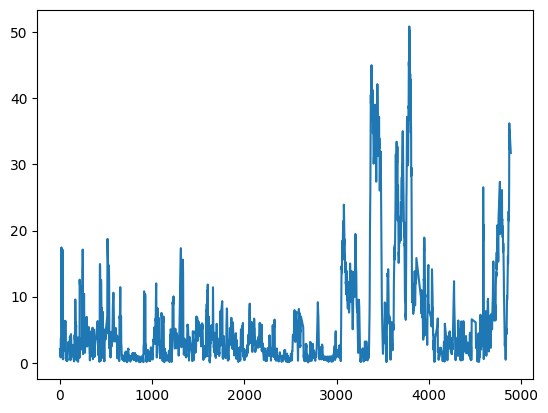

In [271]:
mouse_spd=subset_flat_geos['mouse_spd'].loc[1481]
mouse_spd=mouse_spd.to_numpy()
mouse_spd
plt.plot(mouse_spd)

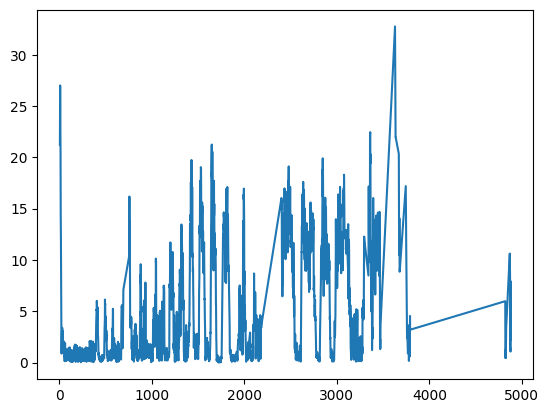

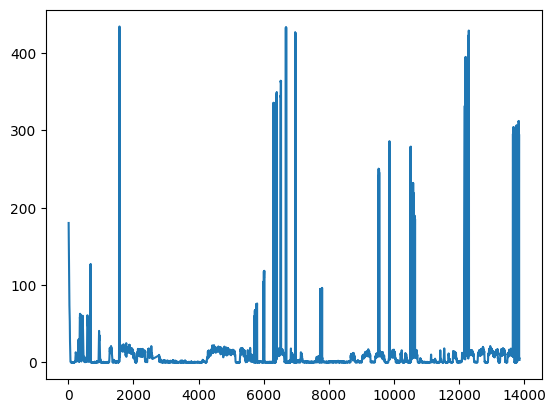

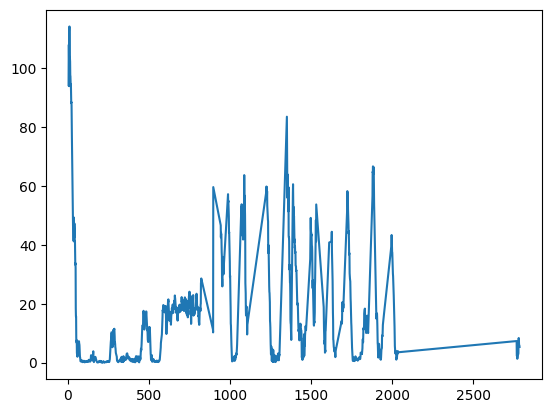

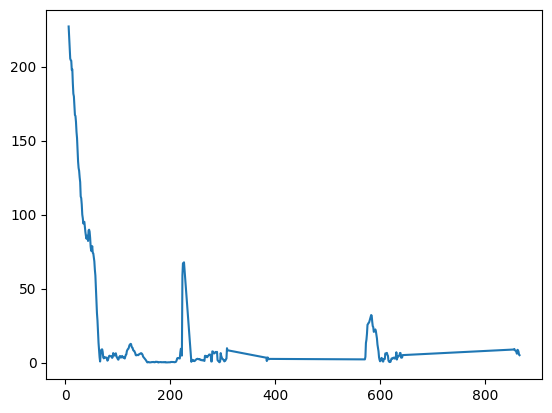

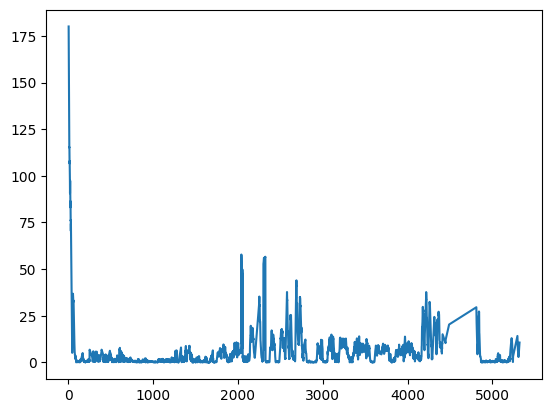

In [300]:
plt.figure()
cricket_spd=subset_flat_geos['cricket_spd'].loc[1481]
cricket_spd=cricket_spd.to_numpy()
cricket_spd
plt.plot(cricket_spd)

plt.figure()
cricket_spd=subset_flat_geos['cricket_spd'].loc[265]
cricket_spd=cricket_spd.to_numpy()
cricket_spd
plt.plot(cricket_spd)

plt.figure()
cricket_spd=subset_flat_geos['cricket_spd'].loc[350]
cricket_spd=cricket_spd.to_numpy()
cricket_spd
plt.plot(cricket_spd)

plt.figure()
cricket_spd=subset_flat_geos['cricket_spd'].loc[2091]
cricket_spd=cricket_spd.to_numpy()
cricket_spd
plt.plot(cricket_spd)

plt.figure()
cricket_spd=subset_flat_geos['cricket_spd'].loc[1348]
cricket_spd=cricket_spd.to_numpy()
cricket_spd
plt.plot(cricket_spd)

In [294]:
nans=np.where(subset_flat_geos['cricket_spd'].loc[1481].isnull())
nans[0]

array([   0,    1,    2,    3,    4,    5,    6,    7, 4881, 4882, 4883,
       4884, 4885, 4886])

In [282]:
random_samples

array([1481,  265,  350, 2091, 1348])

In [295]:
np.where(subset_flat_geos['cricket_spd'].loc[265].isnull())[0]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [296]:
np.where(subset_flat_geos['cricket_spd'].loc[350].isnull())[0]

array([   0,    1,    2,    3,    4, 2787, 2788, 2789, 2790, 2791])

In [297]:
np.where(subset_flat_geos['cricket_spd'].loc[2091].isnull())[0]

array([  0,   1,   2,   3,   4,   5, 867, 868, 869, 870, 871, 872])

In [298]:
np.where(subset_flat_geos['cricket_spd'].loc[1348].isnull())[0]

array([0, 1, 2, 3, 4, 5, 6])

In [301]:
10/200

0.05

In [302]:
10*1300

13000

In [303]:
cricket_spd_1481=subset_flat_geos['cricket_spd'].loc[1481]
cricket_spd_1481=cricket_spd_1481.to_numpy()
cricket_spd_1481

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [304]:
cricket_spd_1481[8]

21.203940830272483

In [305]:
cricket_spd_1481[9]

23.88844340927124

In [306]:
cricket_spd_1481[4880]

2.202858547223798

In [44]:
frames_1481=subset_flat_geos['localframe'].loc[1481].to_numpy()
frames_1481

array([1040, 1041, 1042, ..., 5924, 5925, 5926], dtype=object)

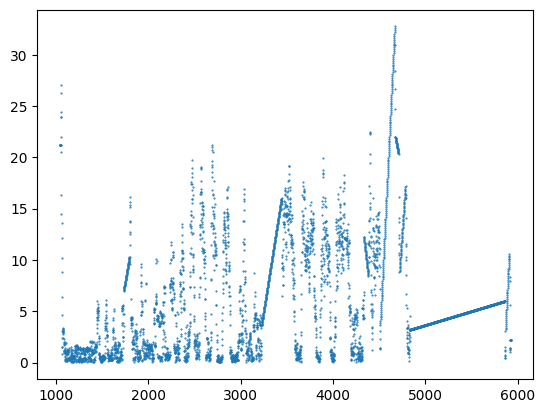

In [45]:
plt.plot(frames_1481, cricket_spd, linestyle="", marker='.', markersize=1)

In [315]:
flat_clipped_tracks['video_filename'].loc[1481].iloc[0]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-25_10-06-14_mouse-0893/Sky_mouse-0893_2022-07-25T10_06_14DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_bp_labeled.mp4'